Streaming output truncated to the last 5000 lines.
Round: 5379: Player Hand: ['10', '7', '5'], Value of the Third Card: 5(5) = 22, Dealer: 17 Outcome: LOSE
Round: 5380: Player Hand: ['4', 'K', '4'], Value of the Third Card: 4(4) = 18, Dealer: 20 Outcome: LOSE
Round: 5381: Player Hand: ['K', '9', '4'], Value of the Third Card: 4(4) = 23, Dealer: 19 Outcome: LOSE
Round: 5382: Player Hand: ['4', '5', '8'], Value of the Third Card: 8(8) = 17, Dealer: 17 Outcome: LOSE
Round: 5383: Player Hand: ['K', '10', 'J'], Value of the Third Card: J(10) = 30, Dealer: 17 Outcome: LOSE
Round: 5384: Player Hand: ['5', '2', '9'], Value of the Third Card: 9(9) = 16, Dealer: 20 Outcome: LOSE
Round: 5385: Player Hand: ['5', '10', '2'], Value of the Third Card: 2(2) = 17, Dealer: 18 Outcome: LOSE
Round: 5386: Player Hand: ['3', '8', '3'], Value of the Third Card: 3(3) = 14, Dealer: 21 Outcome: LOSE
Round: 5387: Player Hand: ['5', '8', '9'], Value of the Third Card: 9(9) = 22, Dealer: 19 Outcome: LOSE
Round: 53

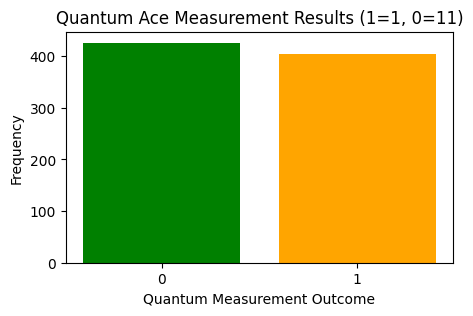

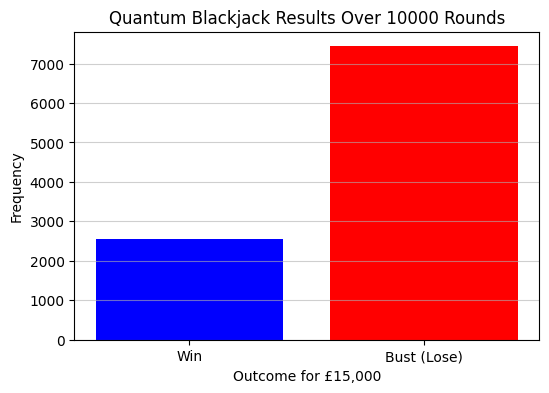

In [ ]:
!pip install "qiskit[visualization]" qiskit-ibm-runtime qiskit-aer qiskit-qasm3-import matplotlib

#Quantum Blackjack with Quantum Ace - A Histogram:
#Dealer's hand - this game ends with the Third card drawn by the player
#So the dealer's hand is revealed according to the rules the dealer would play with: accepting cards from the deck (hitting) until reaching 17 or above
#Initial bet: £5.000. Default winning: double the initial bet. Quantum winning: Triple the inital bet.

print('Quantum Blackjack Scenario:\n'

'You are playing blackjack, the aim of the game is reaching 21 or stay above the hand of the dealer without going above 21.\n'
'And you have drawn two random cards that are not Aces (Total Cards Range = 4- 20). \n'
'The dealer tells you:\n'

'"You can either keep the default rules for Aces, meaning an Ace is valued as 11 by default,'
'and its value automatically becomes 1 if counting it as 11 would cause a bust (a total over 21).'
'By using the default rules, your play would be safer.\n'

'However, we also have another option: a Quantum Ace,'
'which exists in a total superposition between 1 and 11, each with 50% probability.'
'If you play this quantum version of blackjack, you will earn a higher payout if you win."\n'

'You realise that under the default rules, you never go bust immediately if you draw an ace - your total is always safe or exactly 21.'
'This means you can keep playing until you eventually bust or secure your initial bet.\n'

'But in "Quantum Blackjack", the Ace is placed in a quantum superposition of values 1 and 11,'
'independent of the total sum relative to 21.\n'
'This code simulates that scenario and demonstrates that, surprisingly,'
'the probability of going bust is not as high as one might intuitively expect.\n'

'After seeing these results, you decide to play "Quantum Blackjack" as your winning "Blackjack" results change only by ~ 0.2% for more money.\n')


import random
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

cards = {
    '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    'J': 10, 'Q': 10, 'K': 10, 'A': 11
}

#Creating a regular 52-card deck (4 of each rank / type of card)
deck = list(cards.keys()) * 4
deck.pop(0) #Burn the first card (game rules)

def calculate_hand_total(hand):
    total = sum(cards[c] for c in hand)
    return total

num_rounds = 10000
results = {"Win": 0, "Bust (Lose)": 0}
quantum_counts = {"0": 0, "1": 0} #Tracking all quantum Ace measurements

for i in range(num_rounds):
    #Drawing two random non-Ace cards from the deck as per the classical case
    non_ace_cards = [c for c in deck if c != 'A']
    player_hand = random.sample(non_ace_cards, 2)
    total_before_ace = sum(cards[c] for c in player_hand)

    #Drawing the third card (can include Quantum Ace)
    remaining_deck = deck.copy() #copy the first deck

    for card in player_hand:
        remaining_deck.remove(card) #drawing the third card

    third_card = random.choice(remaining_deck)

    #Third card (possible Quantum Ace)
    if third_card == 'A':
        #Quantum Ace: Ace in 50/50 superposition chance of being 1 or 11
        qc = QuantumCircuit(1, 1) #1 qubit and 1 classical bit to store the measurement
        qc.h(0) #Superpose the qubit
        qc.measure(0, 0) #Measuring

        simulator = Aer.get_backend('aer_simulator')
        compiled_qc = transpile(qc, simulator)
        result = simulator.run(compiled_qc, shots=1000).result()
        counts = result.get_counts()

        measured_bit = list(counts.keys())[0]
        ace_value = 11 if measured_bit == '0' else 1
        quantum_counts[measured_bit] += 1
        print("Quantum measurement outcomes for Ace on the Bloch sphere (1=1, 11=0):", counts)

        player_hand.append('A')

    else:
        ace_value = cards[third_card]
        player_hand.append(third_card)
        total_player_hand = calculate_hand_total(player_hand)

    dealer_hand = random.sample(remaining_deck, 2)
    for card in dealer_hand:
        remaining_deck.remove(card)

    total_dealer_hand = calculate_hand_total(dealer_hand)

    while total_dealer_hand < 17: #Casino rule: Dealer keeps on accepting cards (hitting) until they reach 17 or above
        new_card = random.choice(remaining_deck) #No quantum ace for the dealer
        dealer_hand.append(new_card)
        remaining_deck.remove(new_card)
        total_dealer_hand = calculate_hand_total(dealer_hand)

    #Game rules, defining winning and losing:

    if total_player_hand > 21:
        results["Bust (Lose)"] += 1
        outcome = "LOSE"
    elif total_dealer_hand > 21 and total_player_hand <= 21:
        results["Win"] += 1
        outcome = "WIN"
    elif total_player_hand > total_dealer_hand and total_player_hand <= 21:
        results["Win"] += 1
        outcome = "WIN"
    else:
        results["Bust (Lose)"] += 1
        outcome = "LOSE"

    print(f"Round: {i+1:04d}: Player Hand: {player_hand}, Value of the Third Card: {third_card}({ace_value}) = {total_player_hand}, Dealer: {total_dealer_hand} Outcome: {outcome}")



print("Quantum Ace Measurement Counts: ")
print(f"Measured 0 (Ace=11): {quantum_counts['0']}")
print(f"Measured 1 (Ace=1) : {quantum_counts['1']}")

total_played = sum(results.values())

print("Quantum Blackjack Simulation Results:")
for k, v in results.items():
    percentage = (v / total_played) * 100
    print(f"{k}: {v} ({percentage:.1f}%)")

plt.figure(figsize=(5, 3))
plt.bar(quantum_counts.keys(), quantum_counts.values(), color=['green', 'orange'])
plt.title("Quantum Ace Measurement Results (1=1, 0=11)")
plt.xlabel("Quantum Measurement Outcome")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values(), color=['blue', 'red'])
plt.title(f"Quantum Blackjack Results Over {num_rounds} Rounds")
plt.xlabel("Outcome for £15,000")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.6)
plt.show()



#The player would play the quantum ace for more money and would be ever so slightly more likely to go "Bust"
#However, as the winning range changes by just by 0.3%, hence, you would still prefer this, as you have almost the same chances of winning for more money.

Blackjack Simulation Results Over 10,000 Rounds)
Win: 2594 (25.9%)
Bust (Lose): 7406 (74.1%)


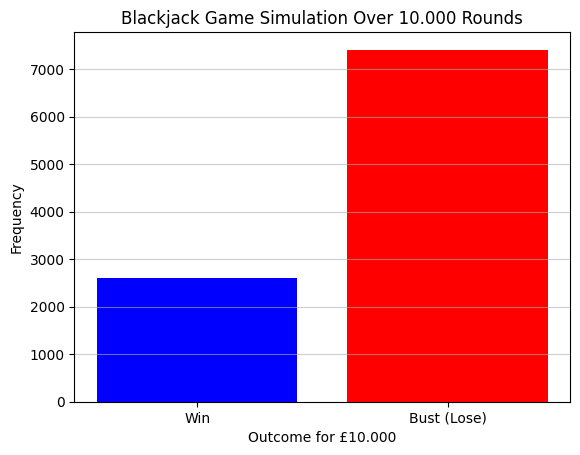

In [ ]:
import random
import matplotlib.pyplot as plt

#Classical/Default Blackjack Outcomes - Histogram:

#Defining card values:
cards = {
    '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    'J': 10, 'Q': 10, 'K': 10, 'A': 11
}

#Creating the deck (4 of each rank)
deck = list(cards.keys()) * 4
deck.pop(0)  #First card is discarded (rule of the game in casinos called 'burning')

#Define hand totals
def calculate_hand_total(hand):
    total = sum(cards[card] for card in hand)#Calculating the total value of the hand by adding the value of each card
    #using the cards list defined above
    aces = hand.count('A') #Counting how many Aces are in the hand
    while total > 21 and aces > 0:
        total -= 10 #Ace counts as 1 instead of 11 if total is above 21, hence, subtract 10 from the total
        aces -= 1 #Reducing the number of aces in the deck
    return total

rounds = 10000 #Ten thousand runs
results = {"Win": 0, "Bust (Lose)": 0}

for _ in range(rounds):

    #Player gets 2 non-ace cards first (pre-requisite of this game):
    non_ace_cards = [c for c in deck if c != 'A'] #A list of all cards in the deck except Aces.
    first_two = random.sample(non_ace_cards, 2)

    remaining_deck = deck.copy()
    for card in first_two:
        remaining_deck.remove(card)

    #Third card drawn (can include Ace)
    third_card = random.choice(remaining_deck)
    remaining_deck.remove(third_card)

    player_hand = first_two + [third_card]
    total_player_hand = calculate_hand_total(player_hand)

    #If player busts immediately, the player loses the game
    if total_player_hand > 21:
        results["Bust (Lose)"] += 1
        continue

    #Dealer's hand (first two draws can contain ace)
    dealer_hand = random.sample(remaining_deck, 2)
    for c in dealer_hand:
        remaining_deck.remove(c)

    total_dealer_hand = calculate_hand_total(dealer_hand)

    while total_dealer_hand < 17: #Dealer keeps on drawing until reaching 17 or above (casino rule)
        new_card = random.choice(remaining_deck)
        dealer_hand.append(new_card)
        remaining_deck.remove(new_card)
        total_dealer_hand = calculate_hand_total(dealer_hand)

    if total_dealer_hand > 21 or total_player_hand > total_dealer_hand:
        results["Win"] += 1 #Increase the amount by one
    else:
        results["Bust (Lose)"] += 1


print("Blackjack Simulation Results Over 10,000 Rounds)")
for outcome, count in results.items():
    percentage = (count / rounds) * 100
    print(f"{outcome}: {count} ({round(percentage, 1)}%)")

plt.bar(results.keys(), results.values(),  color=['blue', 'red'])
plt.title("Blackjack Game Simulation Over 10.000 Rounds")
plt.xlabel("Outcome for £10.000")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.6)
plt.show()


